In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv('tennis_stats.csv')

#### Service Game Columns (Offensive) ####
**Aces:** number of serves by the player where the receiver does not touch the ball  
**DoubleFaults:** number of times player missed both first and second serve attempts  
**FirstServe:** % of first-serve attempts made  
**FirstServePointsWon:** % of first-serve attempt points won by the player  
**SecondServePointsWon:** % of second-serve attempt points won by the player  
**BreakPointsFaced:** number of times where the receiver could have won service game of the player  
**BreakPointsSaved:** % of the time the player was able to stop the receiver from winning service game when they had the chance  
**ServiceGamesPlayed:** total number of games where the player served  
**ServiceGamesWon:** total number of games where the player served and won  
**TotalServicePointsWon:** % of points in games where the player served that they won  

#### Return Game Columns (Defensive) ####    
**FirstServeReturnPointsWon:** % of opponents first-serve points the player was able to win  
**SecondServeReturnPointsWon:** % of opponents second-serve points the player was able to win  
**BreakPointsOpportunities:** number of times where the player could have won the service **game of the opponent  
**BreakPointsConverted:** % of the time the player was able to win their opponent’s service game when they had the chance  
**ReturnGamesPlayed:** total number of games where the player’s opponent served  
**ReturnGamesWon:** total number of games where the player’s opponent served and the player won  
**ReturnPointsWon:** total number of points where the player’s opponent served and the player won  
**TotalPointsWon:** % of points won by the player  

#### Outcomes ####  
**Wins**: number of matches won in a year  
**Losses**: number of matches lost in a year  
**Winnings**: total winnings in USD($) in a year  
**Ranking**: ranking at the end of year  


In [18]:
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon',
             'TotalPointsWon']
features = offensive + defensive
outcomes = ['Wins',
            'Losses',
            'Winnings',
            'Ranking']


In [19]:
sns.set()

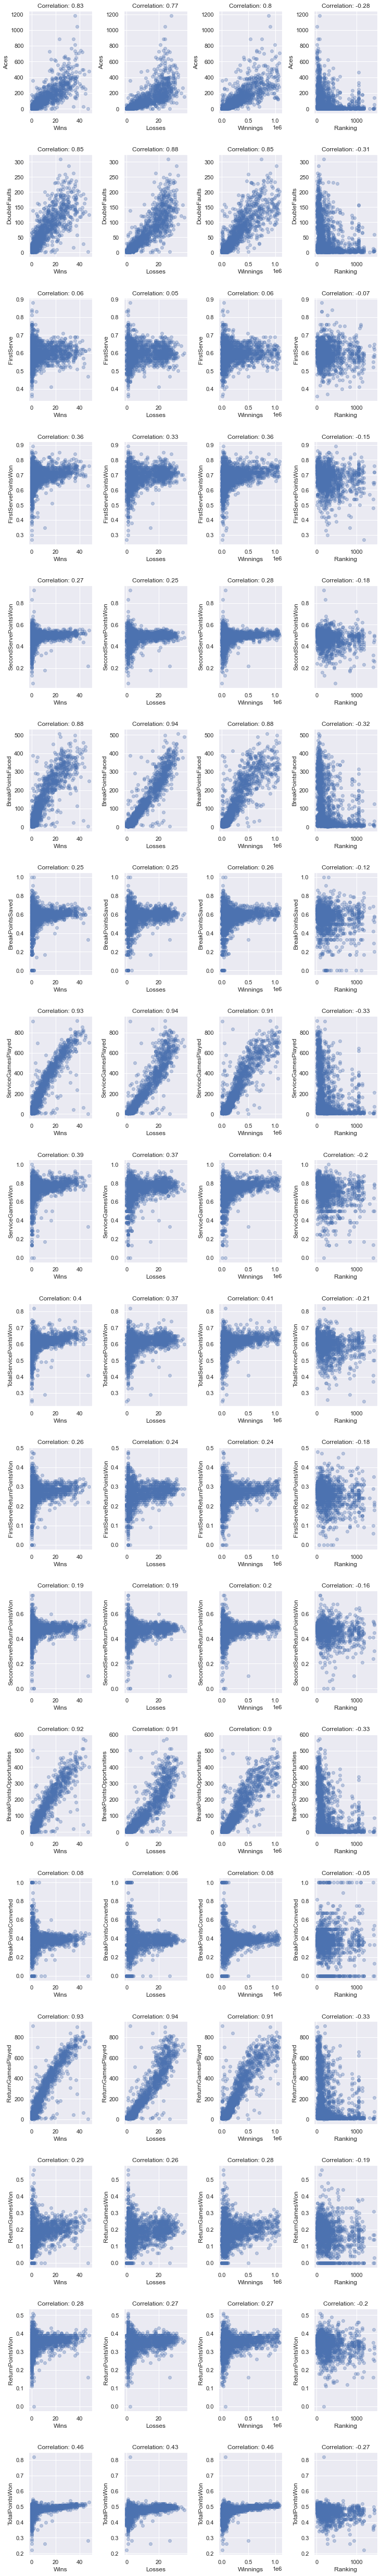

In [25]:
plt.figure(figsize=(12, 90))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]], alpha=0.33)
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 2)}')
plt.show()

### One Feature Linear regression ###

In [40]:
# Define a function

def linear_regression(feature, outcome):
    X = df[feature]
    Y = df[outcome]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,
                                                        test_size=0.2, random_state=42)

    reg = LinearRegression()
    reg.fit(x_train, y_train)
    print(f'Outcome: {outcome}')
    print(f'Train Score: {reg.score(x_train, y_train)}')
    print(f'Test Score: {reg.score(x_test,y_test)}')
    y_predicted = reg.predict(x_test)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_predicted, alpha=0.33)
    plt.xlabel(f'{outcome}')
    plt.ylabel(f'Predicted {outcome}')
    
    plt.show()

Outcome: Winnings
Train Score: 0.8354753864237949
Test Score: 0.8246346885048277


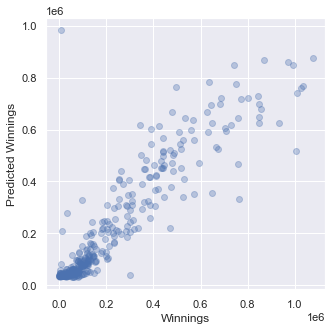

In [39]:
linear_regression(['ServiceGamesPlayed'], 'Winnings')

### Two Feature Linear regression ###

Outcome: Winnings
Train Score: 0.8369710162023802
Test Score: 0.8246054515968316


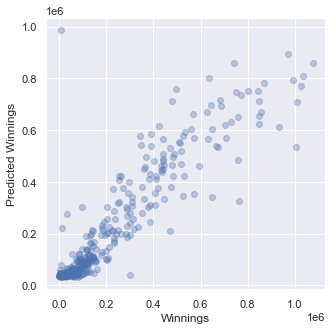

In [41]:
linear_regression(['ServiceGamesPlayed', 'BreakPointsOpportunities'], 'Winnings')

### Multi Feature Linear regression ###

Outcome: Winnings
Train Score: 0.8448655859314528
Test Score: 0.8268140857573166


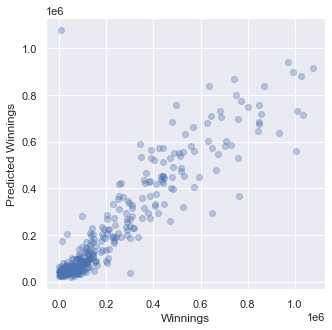

In [42]:
linear_regression(features,'Winnings')